Import libraries

In [13]:
# Import required libraries

import pandas as pd
import os
import requests
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np

%matplotlib inline

In [2]:
# Load the environment variables from the .env file

load_dotenv()

True

Tickers list

In [6]:
#Create list of tickers for the etf portfolio

tickers = ["EEM", "VOO", "VTI", "VTV", "VUG"]


#Review etf portfolio tickers

tickers

['EEM', 'VOO', 'VTI', 'VTV', 'VUG']

API keys

In [3]:
# Set the variables for the Alpaca API and secret keys

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca tradeapi.REST object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca API call

In [4]:
# Set timeframe to 1D 

timeframe = "1D"


# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day

start_date = pd.Timestamp("2020-01-02", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-02", tz="America/New_York").isoformat()


In [7]:
# Use the Alpaca get_barset function to get current closing prices the etf portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame


etf_prices = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df


# Review the bond tickers Alpaca DataFrame

etf_prices.head()


EEM                                      VOO  \
                             open   high    low  close      volume    open   
time                                                                         
2020-01-02 00:00:00-05:00  45.360  45.78  45.35  45.78  62221461.0  297.29   
2020-01-03 00:00:00-05:00  45.030  45.26  44.91  44.94  65297746.0  295.22   
2020-01-06 00:00:00-05:00  44.600  44.87  44.59  44.83  34587065.0  294.42   
2020-01-07 00:00:00-05:00  44.790  44.90  44.69  44.81  54621981.0  296.82   
2020-01-08 00:00:00-05:00  44.725  45.30  44.70  45.04  69807732.0  296.71   

                                                              ...     VTV  \
                             high       low   close   volume  ...    open   
time                                                          ...           
2020-01-02 00:00:00-05:00  298.45  296.3400  298.44  3098524  ...  120.37   
2020-01-03 00:00:00-05:00  297.36  295.0400  296.25  2956475  ...  119.23   
2020-01-06 00:00:00-05:00  297.42  294.3500  297.36  2645636  ...  118.93   
2020-01-07 00:00:00-05:00  297.27  296.0611  296.52  1854570  ...  119.35   
2020-01-08 00:00:00-05:00  299.31  296.5000  298.06  3358222  ...  119.21   

                                                                   VUG  \
                               high       low   close   volume    open   
time                                                                     
2020-01-02 00:00:00-05:00  120.4300  119.7900  120.43  1646401  183.57   
2020-01-03 00:00:00-05:00  119.8300  119.0900  119.48  1387463  182.50   
2020-01-06 00:00:00-05:00  119.6800  118.7664  119.65  1562055  182.33   
2020-01-07 00:00:00-05:00  119.3699  118.9735  119.15  1454586  184.69   
2020-01-08 00:00:00-05:00  119.9624  119.1100  119.48  1354817  184.72   

                                                                   
                               high      low     close     volume  
time                                                               
2020-01-02 00:00:00-05:00  184.7600  183.090  184.7600  1055649.0  
2020-01-03 00:00:00-05:00  184.4389  182.370  183.6100   903194.0  
2020-01-06 00:00:00-05:00  184.7800  182.170  184.7300   777690.0  
2020-01-07 00:00:00-05:00  185.2300  184.215  184.6035   911559.0  
2020-01-08 00:00:00-05:00  186.8500  184.540  186.0300   633410.0  

[5 rows x 25 columns]

MC 10 year simulation

In [8]:
# Configure the Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split evenly across etfs.
# Run 500 samples.

MC_etf_10 = MCSimulation(
    portfolio_data = etf_prices,
    weights = [.2, .2, .2, .2, .2],
    num_simulation = 1000,
    num_trading_days = 252*10)


# Review the simulation input data

MC_etf_10.portfolio_data.head()

EEM                                   \
                             open   high    low  close      volume   
time                                                                 
2020-01-02 00:00:00-05:00  45.360  45.78  45.35  45.78  62221461.0   
2020-01-03 00:00:00-05:00  45.030  45.26  44.91  44.94  65297746.0   
2020-01-06 00:00:00-05:00  44.600  44.87  44.59  44.83  34587065.0   
2020-01-07 00:00:00-05:00  44.790  44.90  44.69  44.81  54621981.0   
2020-01-08 00:00:00-05:00  44.725  45.30  44.70  45.04  69807732.0   

                                           VOO                            ...  \
                          daily_return    open    high       low   close  ...   
time                                                                      ...   
2020-01-02 00:00:00-05:00          NaN  297.29  298.45  296.3400  298.44  ...   
2020-01-03 00:00:00-05:00    -0.018349  295.22  297.36  295.0400  296.25  ...   
2020-01-06 00:00:00-05:00    -0.002448  294.42  297.42  294.3500  297.36  ...   
2020-01-07 00:00:00-05:00    -0.000446  296.82  297.27  296.0611  296.52  ...   
2020-01-08 00:00:00-05:00     0.005133  296.71  299.31  296.5000  298.06  ...   

                                VTV                                   VUG  \
                                low   close   volume daily_return    open   
time                                                                        
2020-01-02 00:00:00-05:00  119.7900  120.43  1646401          NaN  183.57   
2020-01-03 00:00:00-05:00  119.0900  119.48  1387463    -0.007888  182.50   
2020-01-06 00:00:00-05:00  118.7664  119.65  1562055     0.001423  182.33   
2020-01-07 00:00:00-05:00  118.9735  119.15  1454586    -0.004179  184.69   
2020-01-08 00:00:00-05:00  119.1100  119.48  1354817     0.002770  184.72   

                                                                                
                               high      low     close     volume daily_return  
time                                                                            
2020-01-02 00:00:00-05:00  184.7600  183.090  184.7600  1055649.0          NaN  
2020-01-03 00:00:00-05:00  184.4389  182.370  183.6100   903194.0    -0.006224  
2020-01-06 00:00:00-05:00  184.7800  182.170  184.7300   777690.0     0.006100  
2020-01-07 00:00:00-05:00  185.2300  184.215  184.6035   911559.0    -0.000685  
2020-01-08 00:00:00-05:00  186.8500  184.540  186.0300   633410.0     0.007727  

[5 rows x 30 columns]

In [9]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns

MC_etf_10.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001382,0.988165,1.002411,1.017882,1.005529,0.990938,0.995366,1.007527,0.990636,0.998785,...,1.019556,1.009604,1.001412,0.993576,0.997703,0.990254,1.010423,0.982493,1.014327,1.004193
2,1.010234,0.989094,1.019740,1.026410,0.999379,0.994228,0.988475,1.033055,1.000667,0.994665,...,1.019602,1.025531,0.986660,0.989826,1.003556,0.987522,1.018269,0.989404,1.017058,0.995513
3,1.007490,0.993670,1.004635,1.012908,1.000185,0.997058,0.986559,1.033443,1.017009,0.997260,...,1.014654,1.036347,1.001052,0.983854,1.012576,0.985338,1.003506,0.994267,1.019221,1.010268
4,1.008327,1.004233,1.010284,1.012674,0.995654,0.977350,0.988659,1.027283,1.036002,0.999079,...,1.004253,1.032115,1.013282,0.981601,1.011319,0.982318,1.000133,0.989826,1.016045,1.014273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.850402,6.055627,9.688522,8.626560,10.014712,7.245565,10.747341,7.162091,5.672448,1.838434,...,9.249026,11.002054,1.591026,7.995232,5.510997,7.324901,3.901755,10.815235,5.461874,11.810867
2517,5.883394,6.218826,9.603587,8.640904,10.028654,7.302912,10.775524,7.195929,5.631811,1.847686,...,9.187770,10.973453,1.614969,8.057240,5.469654,7.283655,3.891466,10.775398,5.524136,11.956297
2518,5.815247,6.188730,9.435581,8.569009,10.194088,7.267146,10.753850,7.237672,5.622184,1.824133,...,9.373764,11.104900,1.618788,8.199666,5.511699,7.311433,3.868736,10.799076,5.549378,11.920524
2519,5.778957,6.220756,9.130494,8.745836,10.277862,7.311572,10.870725,7.275394,5.531992,1.814768,...,9.388834,11.210029,1.618865,8.178947,5.510992,7.439643,3.901152,10.886896,5.555904,11.829119


MC 10 year visualizations & stats

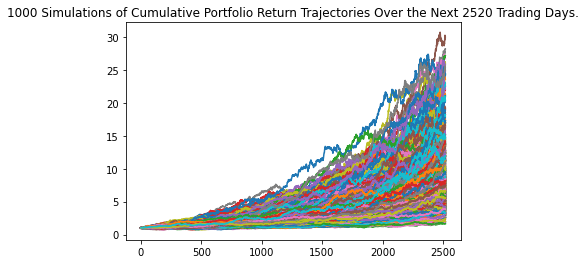

In [14]:
# Plot the 10 year MC simulation for etfs

MC_etf_10_line_plot = MC_etf_10.plot_simulation()


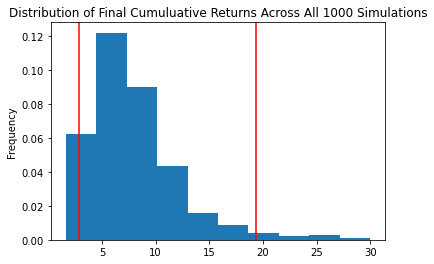

In [16]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram

MC_etf_10_bar_plot = MC_etf_10.plot_distribution()


In [17]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable

MC_etf_10_table = MC_etf_10.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics

print(MC_etf_10_table)


count           1000.000000
mean               7.989053
std                4.225399
min                1.628670
25%                5.045252
50%                7.077659
75%                9.675183
max               29.974787
95% CI Lower       2.865882
95% CI Upper      19.323983
Name: 2520, dtype: float64


MC 10 year 95% confidence interval

In [19]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the bond portfolio

ci_lower_10_cumulative_return = round(MC_etf_10_table[8] * 10000,2)
ci_upper_10_cumulative_return = round(MC_etf_10_table[9] * 10000,2)


# Print the result of your calculations

print(f"There is a 95% chance that the bond portfolio will end up within the range of ${ci_lower_10_cumulative_return} and ${ci_upper_10_cumulative_return} in 10 years.")

There is a 95% chance that the bond portfolio will end up within the range of $28658.82 and $193239.83 in 10 years.


MC 30 year simulation

In [20]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split evenly.
# Run 1000 samples.

MC_etf_30 = MCSimulation(
    portfolio_data = etf_prices,
    weights = [.2, .2, .2, .2, .2],
    num_simulation = 1000,
    num_trading_days = 252*30)


# Review the simulation input data

MC_etf_30.portfolio_data.head()

EEM                                   \
                             open   high    low  close      volume   
time                                                                 
2020-01-02 00:00:00-05:00  45.360  45.78  45.35  45.78  62221461.0   
2020-01-03 00:00:00-05:00  45.030  45.26  44.91  44.94  65297746.0   
2020-01-06 00:00:00-05:00  44.600  44.87  44.59  44.83  34587065.0   
2020-01-07 00:00:00-05:00  44.790  44.90  44.69  44.81  54621981.0   
2020-01-08 00:00:00-05:00  44.725  45.30  44.70  45.04  69807732.0   

                                           VOO                            ...  \
                          daily_return    open    high       low   close  ...   
time                                                                      ...   
2020-01-02 00:00:00-05:00          NaN  297.29  298.45  296.3400  298.44  ...   
2020-01-03 00:00:00-05:00    -0.018349  295.22  297.36  295.0400  296.25  ...   
2020-01-06 00:00:00-05:00    -0.002448  294.42  297.42  294.3500  297.36  ...   
2020-01-07 00:00:00-05:00    -0.000446  296.82  297.27  296.0611  296.52  ...   
2020-01-08 00:00:00-05:00     0.005133  296.71  299.31  296.5000  298.06  ...   

                                VTV                                   VUG  \
                                low   close   volume daily_return    open   
time                                                                        
2020-01-02 00:00:00-05:00  119.7900  120.43  1646401          NaN  183.57   
2020-01-03 00:00:00-05:00  119.0900  119.48  1387463    -0.007888  182.50   
2020-01-06 00:00:00-05:00  118.7664  119.65  1562055     0.001423  182.33   
2020-01-07 00:00:00-05:00  118.9735  119.15  1454586    -0.004179  184.69   
2020-01-08 00:00:00-05:00  119.1100  119.48  1354817     0.002770  184.72   

                                                                                
                               high      low     close     volume daily_return  
time                                                                            
2020-01-02 00:00:00-05:00  184.7600  183.090  184.7600  1055649.0          NaN  
2020-01-03 00:00:00-05:00  184.4389  182.370  183.6100   903194.0    -0.006224  
2020-01-06 00:00:00-05:00  184.7800  182.170  184.7300   777690.0     0.006100  
2020-01-07 00:00:00-05:00  185.2300  184.215  184.6035   911559.0    -0.000685  
2020-01-08 00:00:00-05:00  186.8500  184.540  186.0300   633410.0     0.007727  

[5 rows x 30 columns]

In [21]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns

MC_etf_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000368,1.012082,0.993907,0.997976,0.989210,1.008258,1.015180,0.983554,1.005790,1.011838,...,1.000063,1.012708,1.002350,1.005945,0.983417,0.990762,1.002690,0.988045,1.005533,0.992232
2,1.016324,1.024424,1.006885,1.002877,0.981578,1.015588,1.012877,0.963289,0.999511,1.013539,...,0.991707,1.010486,0.995347,1.011004,0.988397,1.011301,1.009589,0.982125,1.006110,0.992118
3,1.028436,1.002294,1.012668,1.020499,0.986457,1.022204,0.997417,0.962893,0.991013,1.002096,...,0.995523,1.008313,0.989471,1.019398,0.981644,1.029753,1.001863,0.969310,0.998551,0.989248
4,1.016955,0.983367,1.022490,1.023594,0.974762,1.013895,0.996411,0.966968,0.987490,1.014539,...,1.005817,1.009446,0.989190,1.006529,0.995896,1.012341,1.007135,0.975240,0.990536,0.987228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,253.706203,311.220549,433.783726,1000.064175,189.880525,121.394036,280.992297,286.171402,340.785236,428.606406,...,405.450872,218.863236,124.358450,145.999663,61.043670,68.622859,451.941308,380.786872,364.666919,278.949474
7557,251.109205,309.667726,437.267088,996.945976,190.511226,121.293406,285.897786,288.965183,346.228501,430.665593,...,402.501438,214.773604,124.593992,146.369436,59.939628,68.255771,445.734668,376.529272,365.528345,276.074018
7558,251.817279,308.468185,435.833339,998.112070,194.316043,123.517317,286.315904,288.395056,349.001205,426.779846,...,403.054319,216.933046,124.186875,144.441163,59.561312,68.562720,445.981721,373.204633,365.775269,273.794754
7559,250.858661,310.091207,429.982330,994.042210,194.300123,123.387710,288.913810,288.942149,346.209399,428.210528,...,402.357049,216.820662,124.602510,145.072137,60.093227,68.679991,444.760723,367.083188,371.894584,271.437228


MC 30 year visualizations & stats

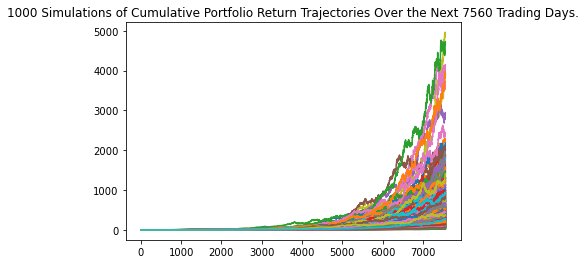

In [22]:
# Plot the 30 year MC simulation for etfs

MC_etf_30_line_plot = MC_etf_30.plot_simulation()


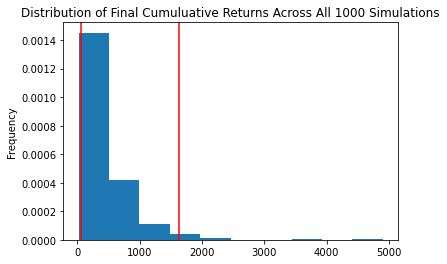

In [23]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram

MC_etf_30_bar_plot = MC_etf_30.plot_distribution()


In [24]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable

MC_etf_30_table = MC_etf_30.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics

print(MC_etf_30_table)


count           1000.000000
mean             464.719954
std              479.340709
min               20.455444
25%              187.995767
50%              338.474049
75%              565.974434
max             4904.083960
95% CI Lower      59.072438
95% CI Upper    1637.612566
Name: 7560, dtype: float64


MC 30 year 95% confidence interval

In [25]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the etf portfolio

ci_lower_30_cumulative_return = round(MC_etf_30_table[8] * 10000,2)
ci_upper_30_cumulative_return = round(MC_etf_30_table[9] * 10000,2)


# Print the result of your calculations

print(f"There is a 95% chance that the etf portfolio will end up within the range of ${ci_lower_30_cumulative_return} and ${ci_upper_30_cumulative_return} in 30 years.")


There is a 95% chance that the etf portfolio will end up within the range of $590724.38 and $16376125.66 in 30 years.


Closing price dataframe

In [10]:
# Create an empty DataFrame to populate the closing prices on the etfs

etf_closing_prices = pd.DataFrame()


# Use for-loop to pull the tickers' closing prices and populate the etf_closing_prices DataFrame

for ticker in tickers:
    etf_closing_prices[ticker] = etf_prices[ticker]["close"] 


# Review DataFrame

etf_closing_prices

,EEM,VOO,VTI,VTV,VUG
time,,,,,
2020-01-02 00:00:00-05:00,45.78,298.44,164.9700,120.43,184.7600
2020-01-03 00:00:00-05:00,44.94,296.25,163.9200,119.48,183.6100
2020-01-06 00:00:00-05:00,44.83,297.36,164.5100,119.65,184.7300
2020-01-07 00:00:00-05:00,44.81,296.52,164.0900,119.15,184.6035
2020-01-08 00:00:00-05:00,45.04,298.06,164.8900,119.48,186.0300
...,...,...,...,...,...
2020-12-24 00:00:00-05:00,50.15,339.17,192.9900,117.28,251.1400
2020-12-28 00:00:00-05:00,50.29,342.08,193.9600,117.67,253.4800
2020-12-29 00:00:00-05:00,51.01,341.45,193.2300,117.48,252.9100


Calculate aggregate daily & annual returns

In [11]:
# Calculate the etfs portfolio aggregate daily returns

etf_portfolio_returns = etf_closing_prices.sum(axis=1).pct_change().dropna()


# Review the first 5 rows of the aggregate daily returns

etf_portfolio_returns.head()

time
2020-01-03 00:00:00-05:00   -0.007589
2020-01-06 00:00:00-05:00    0.003563
2020-01-07 00:00:00-05:00   -0.002351
2020-01-08 00:00:00-05:00    0.005347
2020-01-09 00:00:00-05:00    0.006872
dtype: float64

In [26]:
# Calculate the annual average return data for the for etf portfolios
# Use 252 as the number of trading days in the year

etf_portfolio_avg_returns = etf_portfolio_returns.mean() * 252


# Review the annual average returns for the etf portfolio

etf_portfolio_avg_returns

0.347229137753147

Calculate standard deviation & annual standard deviation

In [12]:
# Calculate the etfs portfolio standard deviation

etf_portfolio_std = etf_portfolio_returns.std()


# Review the standard devations

etf_portfolio_std

0.03792864327755389

In [27]:
# Calculate the annualized standard deviation (252 trading days) of the etf portfolio

etf_portfolio_std_annualized = (etf_portfolio_std * np.sqrt(252))


# Review the annualized std for the etf portfolio

etf_portfolio_std_annualized

0.6020985460709363

Calculate Sharpe Ratio

In [28]:
# Calculate the annualized Sharpe Ratios for the etf portfolio

etf_portfolio_sharpe_ratio = etf_portfolio_avg_returns / etf_portfolio_std_annualized


# Review the Sharpe Ratio for the etfs

etf_portfolio_sharpe_ratio

0.5766981834103917